In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
housing_raw = pd.read_csv(
    "Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [3]:
housing_raw.head(2)

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN


In [4]:
ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.endswith("CA"))]
    .assign(region_name = housing_raw["region_name"].str[:-11])
    .set_index("period_begin").sort_index()
)

In [5]:
ca_housing_pivot = ca_housing.pivot_table(index="period_begin",
                                          columns = "region_name",
                                          values="median_active_list_price").assign(
                                            CA_average = lambda x: x.mean(axis=1))

In [6]:
ca_housing_markets = ca_housing_pivot.loc[:, ["San Francisco",
                                              "Los Angeles",
                                              "San Diego",
                                              "CA_average"]]
ca_housing_markets.head(2)

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623


In [7]:
def cm_to_inches(cm):
    return cm/2.54

In [8]:
datetime(2020, 3, 20) - datetime(1970, 1, 1)

datetime.timedelta(days=18341)

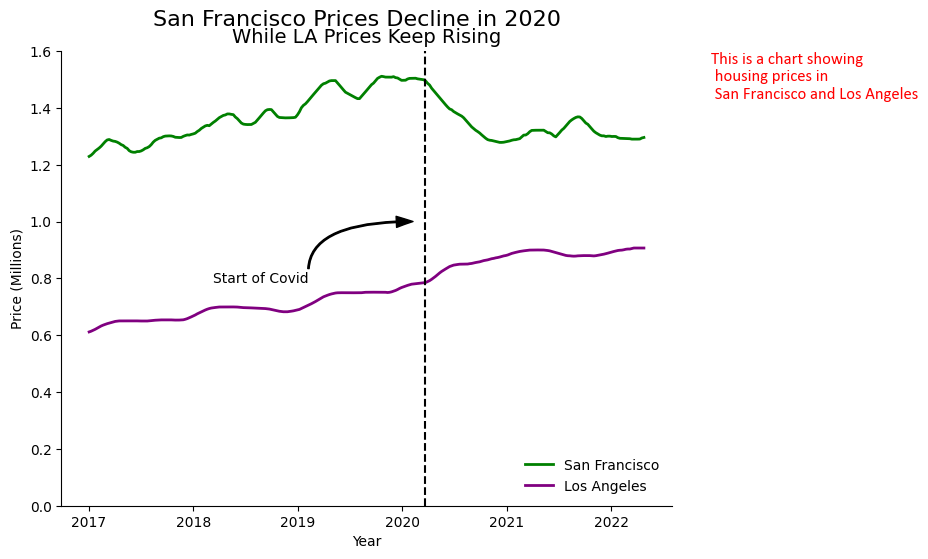

In [9]:
fig, ax = plt.subplots(figsize=(cm_to_inches(20), cm_to_inches(15))) # Size is inches, default is 6.4 x 4.8

# ax.plot(ca_housing_markets)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"] / 1000000, 
    label="San Francisco",
    color="green",
    linewidth = 2
    )
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets["Los Angeles"] / 1000000, 
    label="Los Angeles",
    color="purple",
    linewidth=2
    )

fig.suptitle("San Francisco Prices Decline in 2020", fontsize=16, y=.95) 
# y modifies the y-Coordinate of the Suptitle and therefore spacing between Suptitle and Axtitle

ax.set_title("While LA Prices Keep Rising", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")

# ax.set_xlim(17500, 19000) # Days from 1970-01-01 (Unix style)
ax.set_ylim(0, 1.6)

ax.legend(loc="lower right", frameon=False)

# By using the parameter bbox_to_anchor, it's possible to define the coordinates.
# It's even possible to define coordinates > 1 if I want to place the legend outside the plot
# ax.legend(bbox_to_anchor=(1, 1))
# It's also possible to define the labels within ax.legend:
# ax.legend(["SF", "LA"])

# ax.set_xticks(ca_housing_markets.index[::16])
# plt.xticks(rotation=45)

ax.axvline(18341, color="black", linestyle="--")    # Start of Covid
# ax.text(17900, 1, "Start of Covid -->")

ax.annotate("Start of Covid",
            xy=(18300, 1),
            xytext=(17600, .8),
            arrowprops=dict(
                facecolor="black",
                width=1,
                headwidth=8,
                connectionstyle="angle3, angleA=90, angleB=0"
            ),
            verticalalignment="center"
            )

fig.text(.95,
         .8,
         "This is a chart showing \n housing prices in \n San Francisco and Los Angeles",
         color="red",
         font="Calibri",
         fontsize=12)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

### Stacked Line Charts

In [10]:
ca_housing_pivot = ca_housing.pivot_table(index="period_begin",
                                          columns = "region_name",
                                          values="inventory").assign(
                                            CA_average = lambda x: x.mean(axis=1))

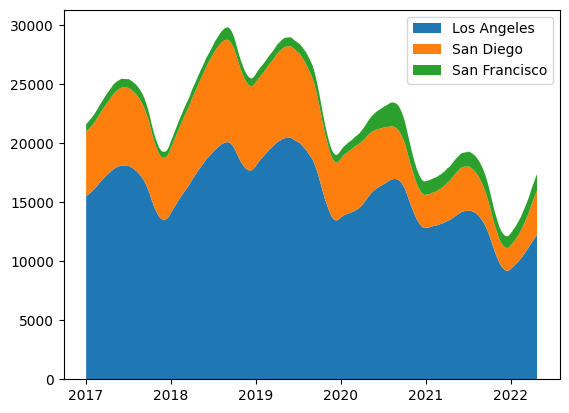

In [11]:
fig, ax = plt.subplots()

labels = ["Los Angeles", "San Diego", "San Francisco"]

ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot["Los Angeles"],
    ca_housing_pivot["San Diego"],
    ca_housing_pivot["San Francisco"],
    labels=labels
)

# To highlight one series, use the bottom series in the line-chart - the bottom is the most visible

ax.legend()

plt.show()

### Dual Axis Charts

In [12]:
ad_dual = (
    ca_housing
    .loc[ca_housing["region_name"] == "San Diego",
         ["inventory", "median_active_list_price"]]
)

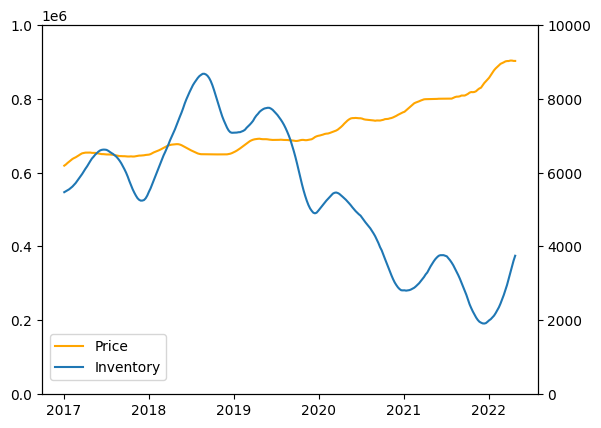

In [13]:
fig, ax = plt.subplots()

ax.plot(ad_dual["median_active_list_price"], label = "Price", c = "orange")
ax.set_ylim(0, 1000000)

ax2 = ax.twinx()
ax2.plot(ad_dual["inventory"], label = "Inventory")
ax2.set_ylim(0, 10000) 

fig.legend(bbox_to_anchor = (.33, .25))

plt.show()

# Bar Charts

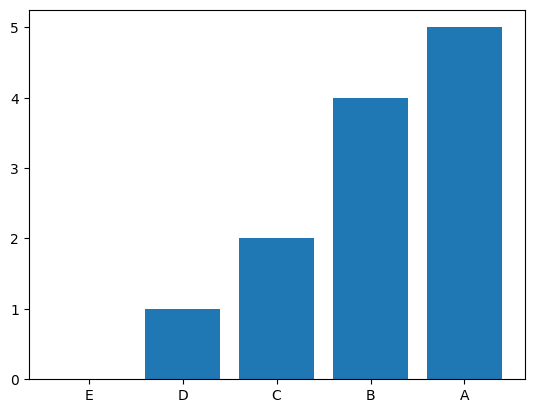

In [14]:
fig, ax = plt.subplots()

labels = ["E", "D", "C", "B", "A"]
data = [0, 1, 2, 4, 5]

ax.bar(labels, data)
# ax.bar(x=labels, height=data)
# ax.barh(y=labels, width=data)
plt.show()

In [15]:
total_sold = (ca_housing
    .groupby("region_name")
    .agg({"total_homes_sold":"sum"})
    .sort_values("total_homes_sold", ascending=False)
    .iloc[:10]
)

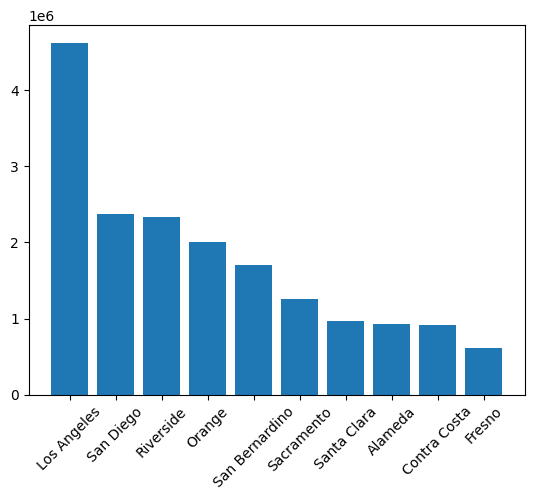

In [16]:
fig, ax = plt.subplots()

ax.bar(x=total_sold.index,
       height=total_sold["total_homes_sold"])

plt.xticks(rotation=45)
plt.show()

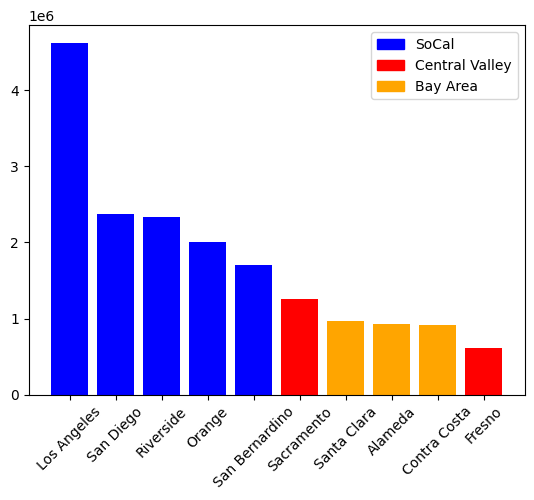

In [17]:
fig, ax = plt.subplots()

colors = [
    "blue",
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red"
]

ax.bar(x=total_sold.index,
       height=total_sold["total_homes_sold"],
       color=colors)

socal = mpatches.Patch(color="blue", label="SoCal")
central = mpatches.Patch(color="red", label="Central Valley")
bay = mpatches.Patch(color="orange", label="Bay Area")

plt.legend(handles=[socal, central, bay], loc="upper right")
plt.xticks(rotation=45)
plt.show()

# Advanced Bar Charts

### Stacked Bar Charts

In [18]:
ca_or_wa = housing_raw.loc[housing_raw["region_name"].str[-2:].isin(["CA", "OR", "WA"])]
ca_or_wa.head(2)

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333


In [19]:
ca_or_wa = ca_or_wa.assign(
    price_range = pd.cut(
        ca_or_wa.loc[:, "median_active_list_price"],
        [0, 400000, 600000, 2000000],
        labels=["0-400k", "400k-600k", "600k+"]
    ),
    state = ca_or_wa["region_name"].str[-2:]
)

In [20]:
ca_or_wa = ca_or_wa.query("period_end == '2021-08-01'").pivot_table(index="price_range",
                                                                    columns="state",
                                                                    values="inventory",
                                                                    aggfunc="sum")

C:\Users\matwa\AppData\Local\Temp\ipykernel_15012\3779949079.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ca_or_wa = ca_or_wa.query("period_end == '2021-08-01'").pivot_table(index="price_range",
C:\Users\matwa\AppData\Local\Temp\ipykernel_15012\3779949079.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ca_or_wa = ca_or_wa.query("period_end == '2021-08-01'").pivot_table(index="price_range",


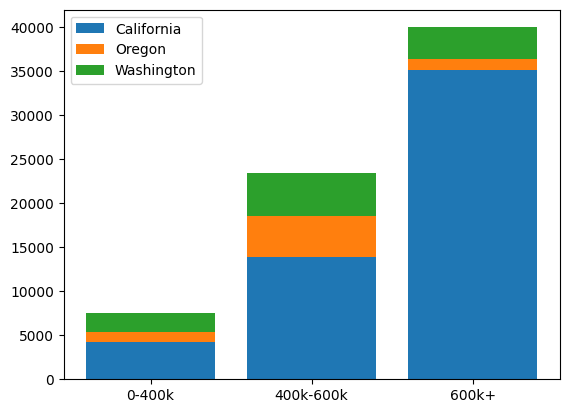

In [21]:
fig, ax = plt.subplots()

ax.bar(
    ca_or_wa.index,
    ca_or_wa["CA"],
    label="California"
)

ax.bar(
    ca_or_wa.index,
    ca_or_wa["OR"],
    label="Oregon",
    bottom=ca_or_wa["CA"]
)

ax.bar(
    ca_or_wa.index,
    ca_or_wa["WA"],
    label="Washington",
    bottom=ca_or_wa["CA"] + ca_or_wa["OR"]
)

plt.legend()

plt.show()

### Grouped Bar Charts

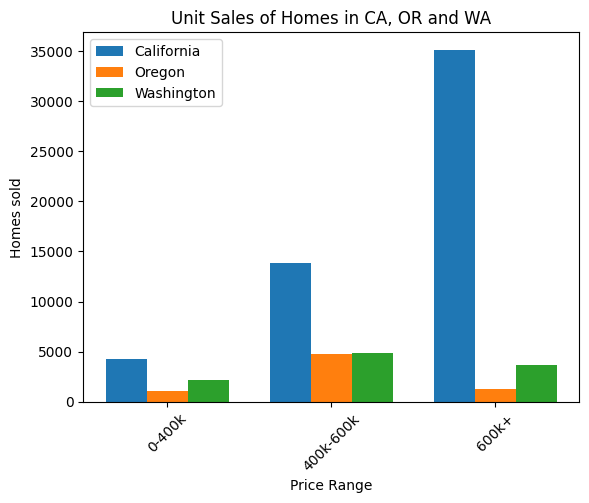

In [22]:
fig, ax = plt.subplots()

width = .25

x1 = np.arange(len(ca_or_wa))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1,
    ca_or_wa["CA"],
    label="California",
    width=width
)

ax.bar(
    x2,
    ca_or_wa["OR"],
    label="Oregon",
    width=width
)

ax.bar(
    x3,
    ca_or_wa["WA"],
    label="Washington",
    width=width
)

ax.set_title("Unit Sales of Homes in CA, OR and WA")
ax.set_ylabel("Homes sold")

ax.set_xlabel("Price Range")
# ax.set_xticks(x2)
# ax.set_xticklabels(ca_or_wa.index)

plt.xticks(
    x2,
    ca_or_wa.index,
    rotation=45
)

ax.legend()

plt.show()

!! It's a lot easier to generate advanced barcharts using Seaborn and Pandas.plot !!

### Combo Charts

In [23]:
sd_dual = (
    ca_housing
    .loc[ca_housing["region_name"] == "San Diego",
        ["inventory", "median_active_list_price"]]
).sort_index()

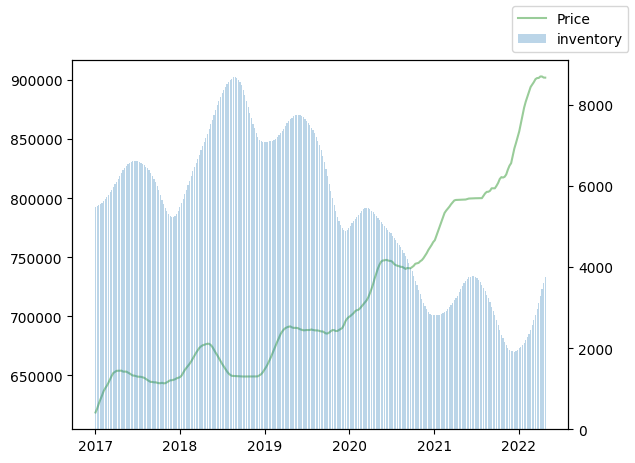

In [24]:
fig, ax = plt.subplots()

width = 5

ax.plot(
    sd_dual["median_active_list_price"],
    color="green",
    alpha=.4,       # makes color less transparent alpha is in [0, 1], 1 is solid, 0 is fully transparent
    label="Price"
)
# ax.legend()

ax2 = ax.twinx()
ax2.bar(sd_dual.index,
        sd_dual["inventory"],
        alpha=.3,
        label="inventory",
        width=width)

# ax2.legend()

fig.legend()

plt.show()

# Pie Charts

In [25]:
sales_totals = (
    ca_housing
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
    .groupby("region_name")
    .agg({"total_homes_sold": "sum"})
)

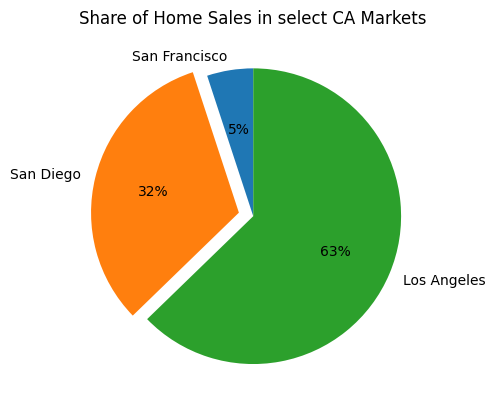

In [38]:
fig, ax = plt.subplots()

ax.pie(x=sales_totals["total_homes_sold"][::-1],
       startangle=90,
       labels=sales_totals.index[::-1],
       autopct="%.0f%%",
       explode=(0, .1, 0)
       )

ax.set_title("Share of Home Sales in select CA Markets")

plt.show()

Donut Charts

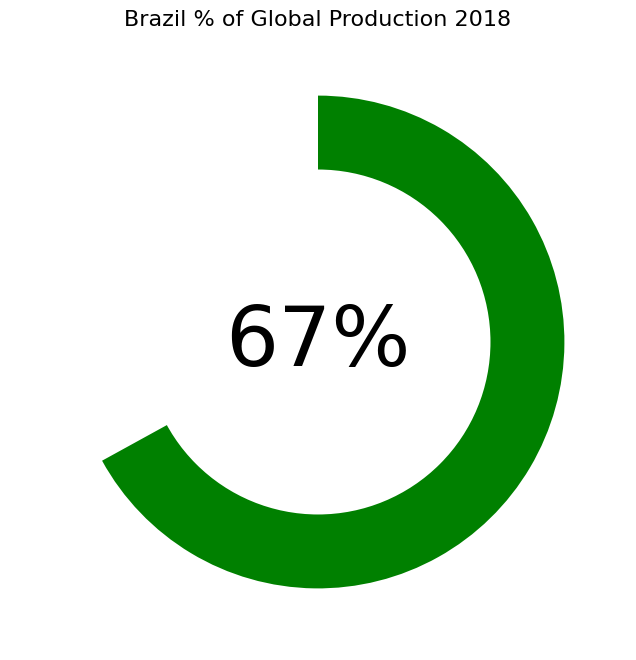

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(
    [.33, .67],
    startangle=90,
    pctdistance=.85,
    colors=["white", "green"]
)

hole = plt.Circle((0, 0), .7, fc="white")
fig = plt.gcf()

# Adding Cirle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    "67%",
    ha="center",
    va="center",
    fontsize=60
)

ax.set_title("Brazil % of Global Production 2018", fontsize=16)

plt.show()

# Histograms

In [50]:
diamonds = (
    pd.read_csv("Data/Diamonds Prices2022.csv")
    .drop(["Unnamed: 0"], axis=1)
)

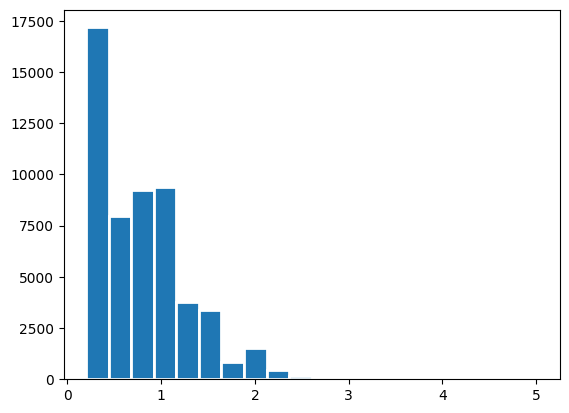

In [62]:
fig, ax = plt.subplots()

ax.hist(
    diamonds["carat"],
    bins=20,
    edgecolor="white",
    linewidth=2
)

plt.show()

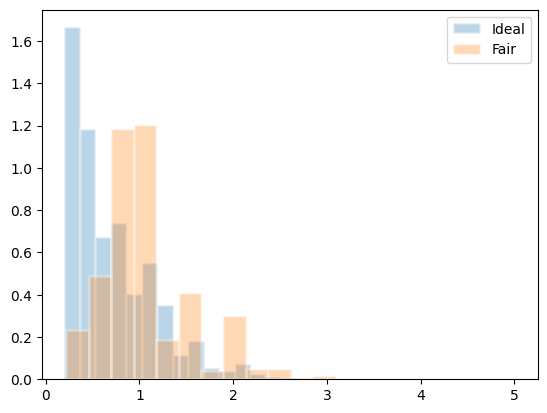

In [ ]:
fig, ax = plt.subplots()

ax.hist(
    diamonds.loc[diamonds["cut"] == "Ideal", ["carat"]],
    bins=20,
    density=True,
    edgecolor="white",
    linewidth=2,
    alpha=.3
)

ax.hist(
    diamonds.loc[diamonds["cut"] == "Fair", ["carat"]],
    bins=20,
    density=True,  # Set density to true when comparing two categories that have drastically different counts
    edgecolor="white",
    linewidth=2,
    alpha=.3
)

ax.legend(["Ideal", "Fair"])

plt.show()